# Custom Image Dataset Testing

## Imports

In [1]:
# Add Utils to path
import sys
sys.path.append('../Utils')  # Adds higher directory to python modules path.

# Utils
from image_enhancement_functions import histogram_equalization, clahe, color_balance_adjustment, min_max_contrast_enhancement
from custom_image_dataset import CustomImageDataset

# Pytorch
from torchvision import transforms

# Other
from PIL import ImageDraw
import matplotlib.pyplot as plt

## Load Data

In [2]:
# Image directory
img_dir = '../ExDark/ExDark'
box_dir = '../ExDark_Annno/ExDark_Annno'

# Define transformations
transform = transforms.Compose([histogram_equalization,
                                clahe,
                                color_balance_adjustment,
                                min_max_contrast_enhancement,
                                transforms.ToPILImage(),
                                transforms.ToTensor()])

# Create dataset
dataset = CustomImageDataset(img_dir=img_dir, box_dir=box_dir, transform=transform)

# Prints for checking
print('Total number of images: ', len(dataset),
      '\nNumber of classes: ', len(dataset.classes),
      '\nClasses: ', dataset.classes,
      '\nNumber of images per class: ', dataset.class_count.values(),
      '\nImages paths: ', dataset.img_paths[:5],
      '\nBox Paths: ', dataset.box_paths[:5])

Total number of images:  7363 
Number of classes:  12 
Classes:  ['Bicycle', 'Boat', 'Bottle', 'Bus', 'Car', 'Cat', 'Chair', 'Cup', 'Dog', 'Motorbike', 'People', 'Table'] 
Number of images per class:  dict_values([652, 679, 547, 527, 638, 735, 648, 519, 801, 503, 609, 505]) 
Images paths:  ['../ExDark/ExDark\\Bicycle\\2015_00001.png', '../ExDark/ExDark\\Bicycle\\2015_00002.png', '../ExDark/ExDark\\Bicycle\\2015_00003.png', '../ExDark/ExDark\\Bicycle\\2015_00004.jpg', '../ExDark/ExDark\\Bicycle\\2015_00005.jpg'] 
Box Paths:  ['../ExDark_Annno/ExDark_Annno\\Bicycle\\2015_00001.png.txt', '../ExDark_Annno/ExDark_Annno\\Bicycle\\2015_00002.png.txt', '../ExDark_Annno/ExDark_Annno\\Bicycle\\2015_00003.png.txt', '../ExDark_Annno/ExDark_Annno\\Bicycle\\2015_00004.jpg.txt', '../ExDark_Annno/ExDark_Annno\\Bicycle\\2015_00005.jpg.txt']


## Plots

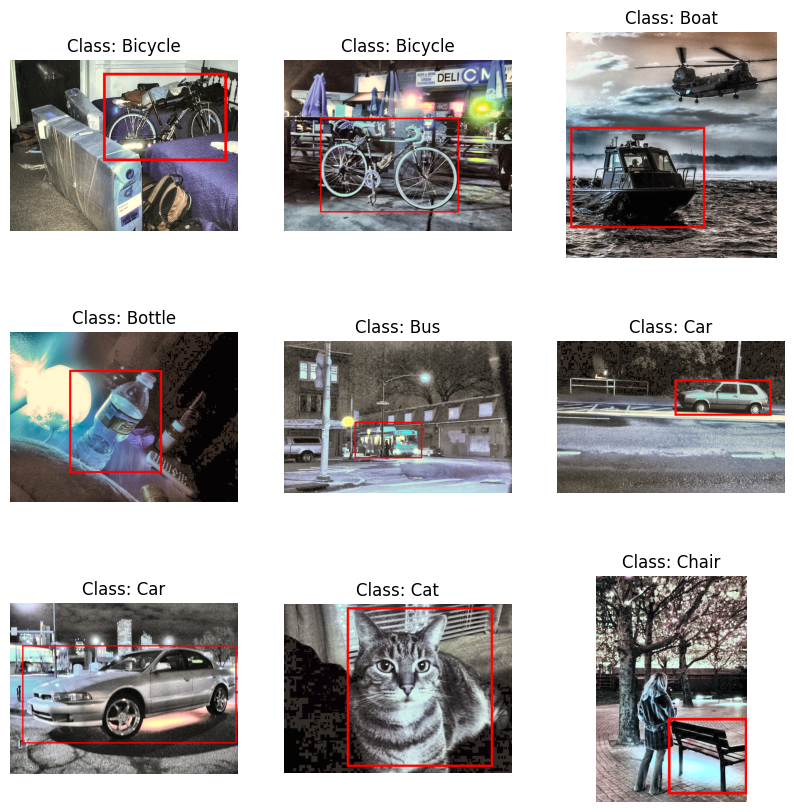

In [3]:
# Show Images
fig = plt.figure(figsize=(10, 10))
for i in range(9):
    # Data
    img, label, box = dataset[i*500]
    img = transforms.ToPILImage()(img)
    draw = ImageDraw.Draw(img) # Para crear las cajas sobre la imagen
    box = [int(x) for x in box]
    box = [box[0], box[1], box[2] + box[0], box[3] + box[1]] 
    #PLot
    ax = plt.subplot(3, 3, i + 1)
    draw.rectangle(box, outline = 'red', width = 6, fill = None)
    plt.imshow(img)
    plt.title('Class: ' + dataset.classes[label])
    plt.axis("off")
plt.show()
